<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вычисление-эффективности-обогащения-на-обучающей-выборке" data-toc-modified-id="Вычисление-эффективности-обогащения-на-обучающей-выборке-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вычисление эффективности обогащения на обучающей выборке</a></span><ul class="toc-item"><li><span><a href="#Вычисление-MAE-для-признака-rougher.output.recovery" data-toc-modified-id="Вычисление-MAE-для-признака-rougher.output.recovery-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Вычисление MAE для признака rougher.output.recovery</a></span></li></ul></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке</a></span></li><li><span><a href="#Выполним-предобработку-данных" data-toc-modified-id="Выполним-предобработку-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Выполним предобработку данных</a></span><ul class="toc-item"><li><span><a href="#Оценка-доли-пропусков-и-их-устранение" data-toc-modified-id="Оценка-доли-пропусков-и-их-устранение-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Оценка доли пропусков и их устранение</a></span><ul class="toc-item"><li><span><a href="#Тестовая-выборка" data-toc-modified-id="Тестовая-выборка-1.3.1.1"><span class="toc-item-num">1.3.1.1&nbsp;&nbsp;</span>Тестовая выборка</a></span></li><li><span><a href="#Обучающая-выборка" data-toc-modified-id="Обучающая-выборка-1.3.1.2"><span class="toc-item-num">1.3.1.2&nbsp;&nbsp;</span>Обучающая выборка</a></span></li><li><span><a href="#Исходные-данные" data-toc-modified-id="Исходные-данные-1.3.1.3"><span class="toc-item-num">1.3.1.3&nbsp;&nbsp;</span>Исходные данные</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследование-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Исследование-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследование концентрации металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Сравнение-распределения-размеров-гранул-сырья" data-toc-modified-id="Сравнение-распределения-размеров-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределения размеров гранул сырья</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях" data-toc-modified-id="Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации всех веществ на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Вычисление-итоговой-sMAPE" data-toc-modified-id="Вычисление-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вычисление итоговой sMAPE</a></span></li><li><span><a href="#Проверка-модель-на-тестовой-выборке" data-toc-modified-id="Проверка-модель-на-тестовой-выборке-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Проверка модель на тестовой выборке</a></span></li></ul></li><li><span><a href="#Итоги" data-toc-modified-id="Итоги-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Итоги</a></span></li></ul></div>

# Исследование технологического процесса очистки золота

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.


## Подготовка данных

In [1]:
#загрузим необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler # для масштабирования количественных признаков
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression # линейная регрессия
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
#Откроем файлы и изучим их
#столбец 'date' представлена в формате object, для преобразования используем команду parse_dates
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv',parse_dates = ['date']) #обучающая выборка
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', parse_dates = ['date']) #тестовая выборка
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv',parse_dates = ['date']) #исходные данные

In [3]:
#изучим данные воспользовавшись унифицированной функцией
def uni_function(function):
    display(function.head())
    display(function.info())
    display(function.isna().mean()) #доля пропущенных значений
    display(function.describe())
    display(function.duplicated().sum())

In [4]:
uni_function(df_train) #обучающая выборка

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                14149 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         14148 non-null  float64       
 2   final.output.concentrate_pb                         14148 non-null  float64       
 3   final.output.concentrate_sol                        13938 non-null  float64       
 4   final.output.concentrate_au                         14149 non-null  float64       
 5   final.output.recovery                               14149 non-null  float64       
 6   final.output.tail_ag                                14149 non-null  float64       
 7   final.output.tail_pb                                14049 non-null  float64       
 8   final.

None

date                                          0.000000
final.output.concentrate_ag                   0.000071
final.output.concentrate_pb                   0.000071
final.output.concentrate_sol                  0.014913
final.output.concentrate_au                   0.000000
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.000071
secondary_cleaner.state.floatbank5_b_air      0.000071
secondary_cleaner.state.floatbank5_b_level    0.000071
secondary_cleaner.state.floatbank6_a_air      0.000141
secondary_cleaner.state.floatbank6_a_level    0.000071
Length: 87, dtype: float64

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


0

In [5]:
uni_function(df_test) #тестовая выборка

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5290 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5286 non-null   float64       
 2   primary_cleaner.input.depressant            5285 non-null   float64       
 3   primary_cleaner.input.feed_size             5290 non-null   float64       
 4   primary_cleaner.input.xanthate              5286 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64       
 9   primary_

None

date                                          0.000000
primary_cleaner.input.sulfate                 0.000756
primary_cleaner.input.depressant              0.000945
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                0.000756
primary_cleaner.state.floatbank8_a_air        0.000000
primary_cleaner.state.floatbank8_a_level      0.000000
primary_cleaner.state.floatbank8_b_air        0.000000
primary_cleaner.state.floatbank8_b_level      0.000000
primary_cleaner.state.floatbank8_c_air        0.000000
primary_cleaner.state.floatbank8_c_level      0.000000
primary_cleaner.state.floatbank8_d_air        0.000000
primary_cleaner.state.floatbank8_d_level      0.000000
rougher.input.feed_ag                         0.000000
rougher.input.feed_pb                         0.000000
rougher.input.feed_rate                       0.000567
rougher.input.feed_size                       0.000189
rougher.input.feed_sol                        0.003970
rougher.in

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


0

In [6]:
uni_function(df_full) #исходные данные

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                19439 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         19438 non-null  float64       
 2   final.output.concentrate_pb                         19438 non-null  float64       
 3   final.output.concentrate_sol                        19228 non-null  float64       
 4   final.output.concentrate_au                         19439 non-null  float64       
 5   final.output.recovery                               19439 non-null  float64       
 6   final.output.tail_ag                                19438 non-null  float64       
 7   final.output.tail_pb                                19338 non-null  float64       
 8   final.

None

date                                          0.000000
final.output.concentrate_ag                   0.000051
final.output.concentrate_pb                   0.000051
final.output.concentrate_sol                  0.010854
final.output.concentrate_au                   0.000000
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.000051
secondary_cleaner.state.floatbank5_b_air      0.000051
secondary_cleaner.state.floatbank5_b_level    0.000051
secondary_cleaner.state.floatbank6_a_air      0.000103
secondary_cleaner.state.floatbank6_a_level    0.000051
Length: 87, dtype: float64

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


0

### Вычисление эффективности обогащения на обучающей выборке

In [7]:
#Рассчитаем эффективность обогащения на обучающей выборке
C = df_train['rougher.output.concentrate_au'] #доля золота в концентрате после флотации/очистки
F = df_train['rougher.input.feed_au'] #доля золота в сырье/концентрате до флотации/очистки
T = df_train['rougher.output.tail_au'] #доля золота в отвальных хвостах после флотации/очистки

recovery = (C*(F-T))/(F*(C-T))*100 #Эффективность обогащения
print(f'Эффективность обогащения золота составляет {recovery}')

Эффективность обогащения золота составляет 0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64


#### Вычисление MAE для признака rougher.output.recovery

In [8]:
mae_recovery = mean_absolute_error(df_train['rougher.output.recovery'], recovery)
display(mae_recovery)

9.73512347450521e-15

**Вывод**    
Среднее абсолютное отклонение(MAE) очень мало, а значит параметр эффективность обогащения расчитан верно.

### Анализ признаков, недоступных в тестовой выборке

В тестовой выборке всего 52 колонки, тогда как в остальных выборках - 86 колонок.
Выясним, каких признаков нет в тестовой выборке.

In [9]:
set_test = set(df_test)
set_full = set(df_full)
set_diff = set_full.difference(set_test)  
display(set_diff)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Отсутствующие столбцы содержат информацию о продукте после стадии очистки и флотации, расчетные характеристики и данные об эффективности обогощения золота(целевой признак). Все эти признаки имеют тип данных float64.

### Выполним предобработку данных

#### Оценка доли пропусков и их устранение

##### Тестовая выборка

In [10]:
#оценим долю пропусков
pd.DataFrame(round(((df_test.isna().mean()*100).sort_values(ascending=False)),2)).style.background_gradient('coolwarm') 

,0
rougher.input.floatbank11_xanthate,0.470000
rougher.input.feed_sol,0.400000
secondary_cleaner.state.floatbank3_a_air,0.170000
rougher.input.floatbank11_sulfate,0.150000
primary_cleaner.input.depressant,0.090000
rougher.input.floatbank10_sulfate,0.090000
primary_cleaner.input.xanthate,0.080000
primary_cleaner.input.sulfate,0.080000
rougher.input.feed_rate,0.060000
secondary_cleaner.state.floatbank2_a_air,0.060000


##### Обучающая выборка

In [11]:
pd.DataFrame(round(((df_train.isna().mean()*100).sort_values(ascending=False)),2)).style.background_gradient('coolwarm') 

,0
secondary_cleaner.output.tail_sol,11.340000
rougher.state.floatbank10_e_air,3.080000
rougher.input.floatbank11_xanthate,3.020000
primary_cleaner.output.concentrate_sol,2.020000
secondary_cleaner.state.floatbank2_a_air,1.530000
final.output.concentrate_sol,1.490000
rougher.input.feed_size,1.020000
primary_cleaner.input.xanthate,0.710000
rougher.input.feed_pb,0.710000
final.output.tail_pb,0.710000


##### Исходные данные

In [12]:
pd.DataFrame(round(((df_full.isna().mean()*100).sort_values(ascending=False)),2)).style.background_gradient('coolwarm') 

,0
secondary_cleaner.output.tail_sol,8.990000
rougher.input.floatbank11_xanthate,2.330000
rougher.state.floatbank10_e_air,2.240000
primary_cleaner.output.concentrate_sol,1.900000
secondary_cleaner.state.floatbank2_a_air,1.130000
final.output.concentrate_sol,1.090000
rougher.input.feed_size,0.750000
primary_cleaner.output.concentrate_pb,0.600000
primary_cleaner.input.xanthate,0.540000
final.output.tail_pb,0.520000


Как мы видим, в каждом датасете присутствует большое количество пропусков. При их удалении, мы можем потерять большую часть данных. Поэтому, необходимо заменить пропущенные значения применив  метод fillna(method="ffill")

In [13]:
df_full = df_full.fillna(method="ffill")
df_test = df_test.fillna(method="ffill")
df_train = df_train.fillna(method="ffill")

In [14]:
#проверка
display(pd.DataFrame(round(((df_full.isna().mean()*100).sort_values(ascending=False)),2)).style.background_gradient('coolwarm'))
display(pd.DataFrame(round(((df_train.isna().mean()*100).sort_values(ascending=False)),2)).style.background_gradient('coolwarm'))
display(pd.DataFrame(round(((df_test.isna().mean()*100).sort_values(ascending=False)),2)).style.background_gradient('coolwarm')) 

,0
date,0.000000
rougher.state.floatbank10_b_air,0.000000
rougher.state.floatbank10_f_air,0.000000
rougher.state.floatbank10_e_level,0.000000
rougher.state.floatbank10_e_air,0.000000
rougher.state.floatbank10_d_level,0.000000
rougher.state.floatbank10_d_air,0.000000
rougher.state.floatbank10_c_level,0.000000
rougher.state.floatbank10_c_air,0.000000
rougher.state.floatbank10_b_level,0.000000


,0
date,0.000000
rougher.state.floatbank10_b_air,0.000000
rougher.state.floatbank10_f_air,0.000000
rougher.state.floatbank10_e_level,0.000000
rougher.state.floatbank10_e_air,0.000000
rougher.state.floatbank10_d_level,0.000000
rougher.state.floatbank10_d_air,0.000000
rougher.state.floatbank10_c_level,0.000000
rougher.state.floatbank10_c_air,0.000000
rougher.state.floatbank10_b_level,0.000000


,0
date,0.000000
rougher.state.floatbank10_c_air,0.000000
rougher.state.floatbank10_d_air,0.000000
rougher.state.floatbank10_d_level,0.000000
rougher.state.floatbank10_e_air,0.000000
rougher.state.floatbank10_e_level,0.000000
rougher.state.floatbank10_f_air,0.000000
rougher.state.floatbank10_f_level,0.000000
secondary_cleaner.state.floatbank2_a_air,0.000000
secondary_cleaner.state.floatbank2_a_level,0.000000


**Вывод**    
Мы подготовили данные для дальнейшей работы, а для этого мы:
    1. проверили верность расчета параметра эффективность обогащения. Табличные данные совпали с расчетными, значит параметр указан верно.    
    2. Проанализировали, каких данных не хватает в тестовой выборке
    3. устранили найденные пропуски с помощью метода fillna(method="ffill").
Данные проверены и теперь мы можем приступать к дальнейшему исследованию.

## Анализ данных

### Исследование концентрации металлов (Au, Ag, Pb) на различных этапах очистки

Этапы технологического процесса:    
1. флотация золоносной руды (rougher.input.feed) --> черновой концентрат (rougher.output.concentrate)    
2. первый этап очистки (primary_cleaner.output.concentrate)    
3. финальный концентрат ()    

In [15]:
#напишем функцию которая будет рассчитывать концентрацию на каждом этапе
def concentration(metal, title):
    x_1 = df_full[f'rougher.input.feed_{metal}'] #флотация сырья
    x_2 = df_full[f'rougher.output.concentrate_{metal}'] #черновой концентрат
    x_3 = df_full[f'primary_cleaner.output.concentrate_{metal}'] #первичная очистка
    x_4 = df_full[f'final.output.concentrate_{metal}'] #финальный концентрат
   
    
    plt.figure(figsize = (12, 6))
    sns.distplot(x_1, kde_kws = {'label':'флотация сырья'}, color= 'tab:pink')
    sns.distplot(x_2, kde_kws = {'label':'черновой концентрат'}, color='tab:green')
    sns.distplot(x_3, kde_kws = {'label':'первичная очистка'}, color='tab:orange')
    sns.distplot(x_4, kde_kws = {'label':'финальный концентрат'}, color= 'tab:purple')
    
    
    plt.title(label=f'Концентрация {title} на различных этапах очистки', fontsize=15)
    plt.xlabel('Концентрация')
    plt.ylabel('Количество наблюдений')
    plt.legend()
    plt.show()

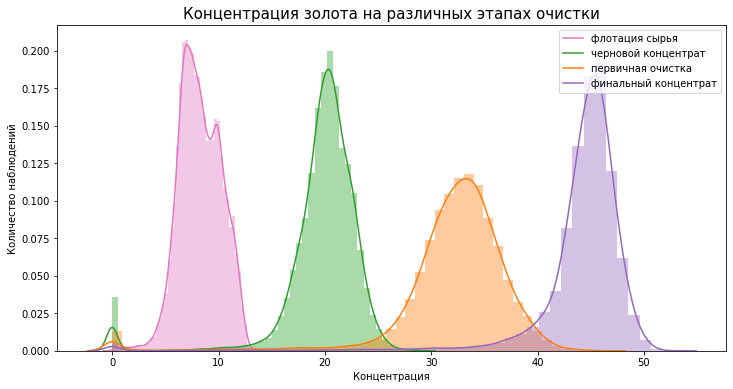

In [16]:
concentration('au', 'золота')

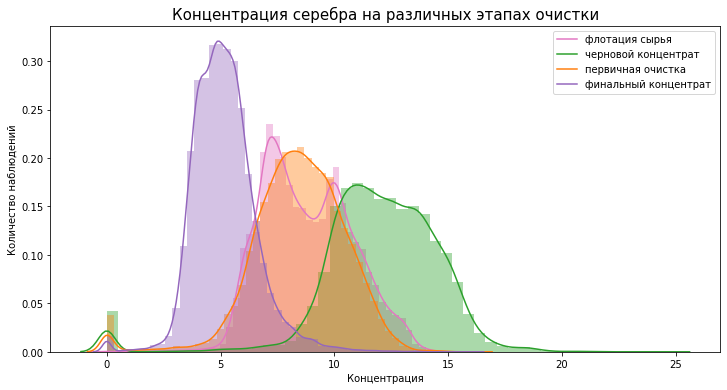

In [17]:
concentration('ag', 'серебра')

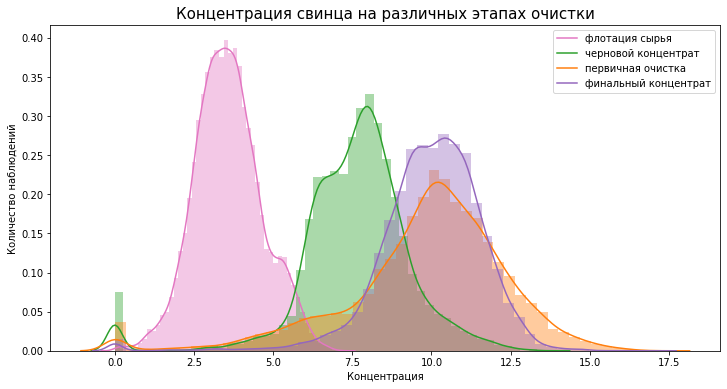

In [18]:
concentration('pb', 'свинца')

**Вывод**    
- Концентрация золота увеличивается после каждого этапа очистки
- После флотации концентрация серебра увеличивается, а в результате дальнейшей обработки, концентрация заметно уменьшается.
- Концентрация свинца увелицивается на протяжении всего технологического процесса до момента первичного этапа очистки. После него мы видим небольшое снижение концентрации 

### Сравнение распределения размеров гранул сырья

Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

In [19]:
def granule_size(step, title):
    x0 = df_train[f'{step}.input.feed_size']
    x1 = df_test[f'{step}.input.feed_size']
    plt.figure(figsize=(12, 6))
    sns.distplot(x0, kde_kws= {"label": "Train"})
    sns.distplot(x1, kde_kws= {"label": "Test"})
    plt.xlabel('Размер гранул')
    plt.ylabel('Количество наблюдений')
    plt.title(label=f'Распределение размеров гранул сырья для {title}', fontsize=15)
    plt.legend()
    plt.show()

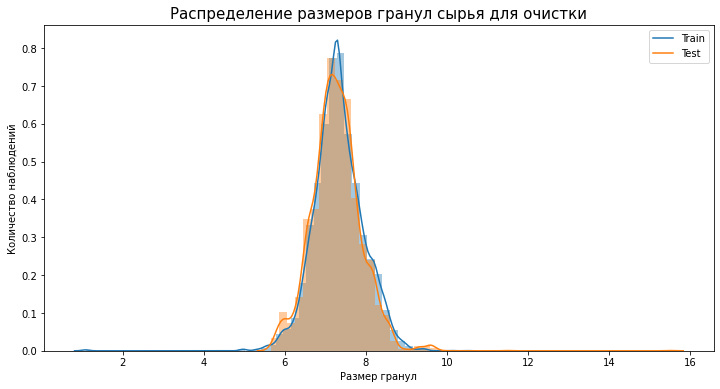

In [20]:
granule_size('primary_cleaner', 'очистки')

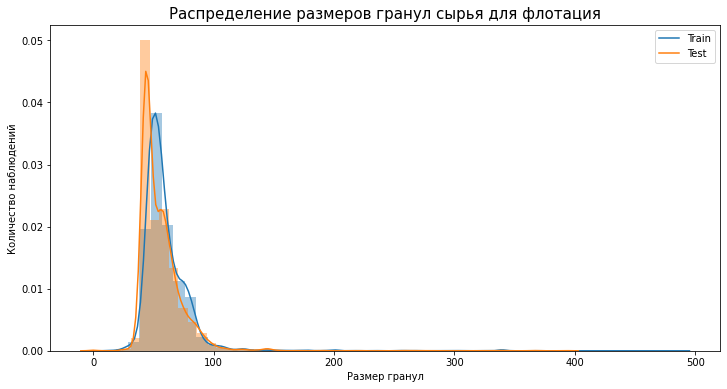

In [21]:
granule_size('rougher', 'флотация')

**Вывод**     
Как мы видим из гистограмм,распределение размер гранул для обучающей и тестовой выборки практически не отличаются, а значит, оценка модели в дальнейшем будет верной. Может переходить к следующему этапу исследования.

### Исследование суммарной концентрации всех веществ на разных стадиях

Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.    
Заметили аномальные значения в суммарном распределении или нет?    
Если они есть, стоит ли их удалять из обеих выборок?    
Опишите выводы и удалите аномалии.    

In [22]:
def func(sample, stage):
    ag = sample[f'{stage}ag']
    au = sample[f'{stage}au']
    pb = sample[f'{stage}pb']
    sol = sample[f'{stage}sol']
    total_conc = ag + au + pb + sol
    return total_conc

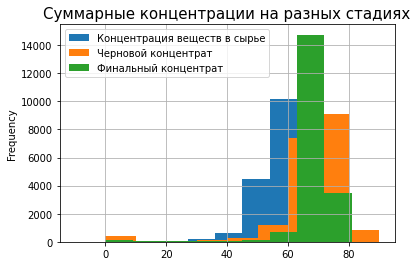

In [23]:
func(df_full, 'rougher.input.feed_').plot(y='total_conc', kind='hist',label='Концентрация веществ в сырье', grid=True, bins=10, range=(0, 90))
func(df_full,'rougher.output.concentrate_').plot(y='total_conc', kind='hist',label='Черновой концентрат', grid=True, bins=10, range=(-10, 90))
func(df_full,'final.output.concentrate_').plot(y='total_conc', kind='hist',label='Финальный концентрат', grid=True, bins=10, range=(0, 90))
plt.title(label='Суммарные концентрации на разных стадиях', fontsize=15)
plt.legend()   
plt.show()

Как мы видим из гистограмм, после флотации в черновом концетрате, суммарная концентрация веществ равна 0, удалим такие значения для чернового концентрата в исходном датасете и в обучающей выборке.

In [24]:
df_full['rougher.output.total_concentrate'] = df_full[['rougher.output.concentrate_au',
                                               'rougher.output.concentrate_ag',
                                               'rougher.output.concentrate_pb',
                                               'rougher.output.concentrate_sol']].sum(axis=1)
df_full['final.output.total_concentrate'] = df_full[['final.output.concentrate_au',
                                               'final.output.concentrate_ag',
                                               'final.output.concentrate_pb',
                                               'final.output.concentrate_sol']].sum(axis=1)
df_full_new= df_full[df_full['rougher.output.total_concentrate'] != 0]
df_full_new= df_full_new[df_full_new['final.output.total_concentrate'] != 0]
display(df_full.shape)
display(df_full_new.shape)

(19439, 89)

(18949, 89)

In [25]:
df_train['rougher.output.total_concentrate'] = df_train[['rougher.output.concentrate_au',
                                               'rougher.output.concentrate_ag',
                                               'rougher.output.concentrate_pb',
                                               'rougher.output.concentrate_sol']].sum(axis=1)
df_train['final.output.total_concentrate'] = df_train[['final.output.concentrate_au',
                                               'final.output.concentrate_ag',
                                               'final.output.concentrate_pb',
                                               'final.output.concentrate_sol']].sum(axis=1)
df_train_new= df_train[df_train['rougher.output.total_concentrate'] != 0]
df_train_new= df_train_new[df_train_new['final.output.total_concentrate'] != 0]
display(df_train.shape)
display(df_train_new.shape)

(14149, 89)

(13795, 89)

После удаления нулевых значений в черновом концентрате, посмотрим как изменится распределение концентрации

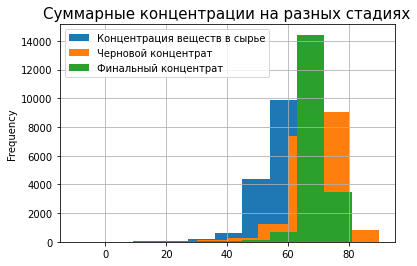

In [26]:
func(df_full_new, 'rougher.input.feed_').plot(y='total_conc', kind='hist',label='Концентрация веществ в сырье', grid=True, bins=10, range=(0, 90))
func(df_full_new,'rougher.output.concentrate_').plot(y='total_conc', kind='hist',label='Черновой концентрат', grid=True, bins=10, range=(-10, 90))
func(df_full_new,'final.output.concentrate_').plot(y='total_conc', kind='hist',label='Финальный концентрат', grid=True, bins=10, range=(0, 90))
plt.title(label='Суммарные концентрации на разных стадиях', fontsize=15)
plt.legend()   
plt.show()

**Вывод**    
На данном этапе анализа, мы обнаружили анамалию в данных и устранили ее, удалив нулевые суммарные значения из исходных данных и обучающей выборки. Тестовую выборку мы не затронули, т.к. там нет данных о продукте после флотации и на финальном этапе. Количестводанных сократилось на 2.5%. Кроме того, по результатам анализа гистограмм мы видим, что суммарная концентрация веществ уменьшается после каждого этапа очистки.

## Модель

3.1. Напишите функцию для вычисления итоговой sMAPE.    
3.2. Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке.   Опишите выводы.     

### Вычисление итоговой sMAPE

In [27]:
#создадим функцию для расчета sMAPE
def smape(target, predictions): #y_target-целевой признак, y_pred-предсказание
    return ((1/len(target)) * np.sum(2 * np.abs(target-predictions) / (np.abs(target) + np.abs(predictions))))*100
#сделаем из функции переменную smape_scorer с помощью make_scorer
smape_scorer = make_scorer(smape, greater_is_better=False)


Модель можно обучать только на тех признаках, которые присутствуют в тестовом датасете. Остальные признаки нужно удалить из трейна на этапе обучения модели

In [28]:
#в обучающей выборке оставляет те же признаки, что и в тестовой выборке
df_train = df_train_new[df_test.columns] #обучающая выборка

display(df_train.shape)
display(df_test.shape)
display(df_full_new.shape)

(13795, 53)

(5290, 53)

(18949, 89)

In [29]:
#чтобы кол-во строк совпадало во всех датафреймах воспользуемся методом merge
df_full_train = df_full_new.merge(df_train, how ='right', on = ['date'], suffixes = ('', '_y'))
df_full_train.drop(df_full_train.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

df_full_test = df_full_new.merge(df_test, how ='right', on = ['date'], suffixes = ('', '_y'))
df_full_test.drop(df_full_test.filter(regex='_y$').columns.tolist(),axis=1, inplace=True)

display(df_full_train.shape)
display(df_full_test.shape)
#uni_function(df_full_test)

(13795, 89)

(5290, 89)

In [30]:
df_train = df_train.drop('date', axis=1)
df_test = df_test.drop('date', axis=1)

In [31]:
#флотация
features_rougher_train = df_train #признаки 
features_rougher_test = df_test #признаки 
target_rougher_train = df_full_train['rougher.output.recovery'] #целевой признак
target_rougher_test = df_full_test['rougher.output.recovery'] #целевой признак

#Финальный концентрат
features_final_train = df_train #признаки 
features_final_test = df_test #признаки 
target_final_train = df_full_train['final.output.recovery'] #целевой признак
target_final_test = df_full_test['final.output.recovery'] #целевой признак


In [32]:
# проведем масштабирование признаков этапа флотации
scaler_rougher = StandardScaler()
scaler_rougher.fit(features_rougher_train)

train_col_rougher = features_rougher_train.columns
test_col_rougher = features_rougher_test.columns

features_rougher_train = scaler_rougher.transform(features_rougher_train)
features_rougher_train = pd.DataFrame(features_rougher_train, columns = train_col_rougher)

features_rougher_test = scaler_rougher.transform(features_rougher_test)
features_rougher_test = pd.DataFrame(features_rougher_test, columns = test_col_rougher)

In [33]:
# проведем масштабирование признаков финального этапа

scaler_final = StandardScaler()
scaler_final.fit(features_final_train)

train_col_final = features_final_train.columns
test_col_final = features_final_test.columns

features_final_train = scaler_final.transform(features_final_train)
features_final_train = pd.DataFrame(features_final_train, columns = train_col_final)

features_final_test = scaler_final.transform(features_final_test)
features_final_test = pd.DataFrame(features_final_test, columns = test_col_final)

In [34]:
#Создадим функцию для оценки качества модели с помощью кросс-валидации.
def cross_val (model, features, target):
    scores = cross_val_score(model, features, 
                                   target, scoring=smape_scorer, cv=5)
    smape_res = np.mean(scores) #Средняя оценка качества модели
    return smape_res

In [35]:
#Создадим функцию для автоматического вывода smape каждого этапа и финальной sMAPE.
def total_smape(model):
    smape_rougher = (cross_val(model, features_rougher_train, target_rougher_train))*(-1)
    smape_final = (cross_val(model, features_final_train, target_final_train))*(-1)
    total_smape = (0.25*smape_rougher + 0.75*smape_final)
    print('Средняя оценка качества модели по кросс-валидации на этапе флотации составила:',smape_rougher)
    print('Средняя оценка качества модели по кросс-валидации на финальном этапе составила:',smape_final)
    print('Итоговое sMAPE по кросс-валидации составило:', total_smape)

Спрогнозируем значения sMAPE для следующих алгоритмов:    
1. Линейная регрессия;    
2. Решающее дерево;
3. Случайный лес.    
4.В качестве проверки успешности моделей сравним их со случайной моделью, для этого применим DummyRegressor.

In [36]:
model = LinearRegression()
total_smape(model)

Средняя оценка качества модели по кросс-валидации на этапе флотации составила: 7.267806730900352
Средняя оценка качества модели по кросс-валидации на финальном этапе составила: 10.990200515158017
Итоговое sMAPE по кросс-валидации составило: 10.059602069093602


In [37]:
model = DecisionTreeRegressor()
total_smape(model)

Средняя оценка качества модели по кросс-валидации на этапе флотации составила: 9.683088746556445
Средняя оценка качества модели по кросс-валидации на финальном этапе составила: 17.45264911404371
Итоговое sMAPE по кросс-валидации составило: 15.510259022171892


In [38]:
model = RandomForestRegressor()
total_smape(model)

Средняя оценка качества модели по кросс-валидации на этапе флотации составила: 7.335959801674167
Средняя оценка качества модели по кросс-валидации на финальном этапе составила: 9.880143375206945
Итоговое sMAPE по кросс-валидации составило: 9.24409748182375


In [39]:
model = DummyRegressor()
total_smape(model)

Средняя оценка качества модели по кросс-валидации на этапе флотации составила: 7.804618399753869
Средняя оценка качества модели по кросс-валидации на финальном этапе составила: 10.447654847065328
Итоговое sMAPE по кросс-валидации составило: 9.786895735237463


Исходя из полученных данных мы видим, что итоговое sMAPE получается у случайного леса. Попробуем определить наилучшие параметры для данной модели и оценить как изменится итоговое sMAPE.

In [40]:
best_smape = 10
best_est = 0
best_depth = 0
for est in range(10, 51, 10):
    for depth in range(1, 11):
        model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth) # обучим модель с заданным количеством деревьев
        smape_rougher = (cross_val(model, features_rougher_train, target_rougher_train))*(-1)
        smape_final = (cross_val(model, features_final_train, target_final_train))*(-1)
        total_smape = (0.25*smape_rougher + 0.75*smape_final)
        if total_smape < best_smape:
            best_smape = total_smape
            best_est = est
            best_depth = depth

print('Итоговое sMAPE по кросс-валидации составило:', best_smape)
print ('Оптимальная глубина деревьев:', best_depth)
print ('Оптимальное количество деревьев:', best_est)

Итоговое sMAPE по кросс-валидации составило: 8.50348408799725
Оптимальная глубина деревьев: 4
Оптимальное количество деревьев: 50


### Проверка модель на тестовой выборке

In [41]:
model_rougher = RandomForestRegressor(max_depth=4, n_estimators=50)
model_rougher.fit(features_rougher_train, target_rougher_train)  #обучение модели на тренировочной выборке
rougher_test_predictions = model_rougher.predict(features_rougher_test) # код расчёта на тестовой выборке

model_final = RandomForestRegressor(max_depth=4, n_estimators=50)
model_final.fit(features_final_train, target_final_train)  #обучение модели на тренировочной выборке
final_test_predictions = model_final.predict(features_final_test) # код расчёта на тестовой выборке

smape_rougher = smape(target_rougher_test, rougher_test_predictions)
smape_final = smape(target_final_test, final_test_predictions)
smape_end = 0.25 * smape_rougher + 0.75 * smape_final
print('Средняя оценка качества по кросс-валидации на этапе флотации составила', smape_rougher)
print('Средняя оценка качества по кросс-валидации на финальном этапе составила', smape_final)
print('Конечная оценка качества по кросс-валидации составила', smape_end)


Средняя оценка качества по кросс-валидации на этапе флотации составила 4.6396166284048705
Средняя оценка качества по кросс-валидации на финальном этапе составила 7.952301564050651
Конечная оценка качества по кросс-валидации составила 7.124130330139206


## Итоги

В данной работе нами были проделаны следующие шаги:
1. Изучены и обработаны исходные данные;
2. Нами было проведено исследование суммарных концентрации веществ на различных этапах очистки, в ходе которого мы определили, что концентрация веществ к концу процесса уменьшается;
3. Подготовлена автоматизированная функция поиска наилучшего sMAPE с помощью кросс-валидации;
4. Наилучшей моделью оказался случайный лес с 50 деревьями и глубиной 4. Финальная sMAPE для данной модели на тестовой выборке составила 7.135.